In [3]:
from aiida.orm import QueryBuilder, Group, Node
import aiida

aiida.load_profile('quicksetup')

In [51]:
group_name1 = 'li_s_rc_qcut'
group_name2 = 'li_s_rc_qcut-zoom-in'

qb = QueryBuilder()
qb.append(Group, filters={'label': {
    'or': [
        # {'==': group_name1}, 
        {'==': group_name2},
    ]
    }}, tag='group')
qb.append(Node, with_group='group', tag='calc')
qb.append(Node, with_outgoing='calc', edge_filters={'label': 'angular_momentum_settings'}, project=['attributes.s.rc', 'attributes.s.qcut'])
qb.append(Node, with_incoming='calc', edge_filters={'label': 'output_parameters'}, project=['attributes'])
results = list(qb.all())

Text(0.5, 1.0, 'Li-s: abs_error w.r.t rc(1.1~2.0)-qcut(8.0~16.0)')

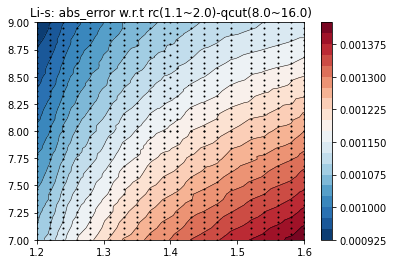

In [52]:
import numpy as np
import matplotlib.pyplot as plt

lst_x = []
lst_y = []
lst_z = []
for r in results:
    
    d = r[2]
    g_factor = 1000 # the factor (weight) for ground state error, we what the ground state described accurate 
    
    try:
        ev = (d['tc_0']['state_error_avg'] * g_factor + d['tc_1']['state_error_avg'] + d['tc_2']['state_error_avg']) / 3
    except KeyError:
        continue
    else:
        lst_x.append(r[0])
        lst_y.append(r[1])
        lst_z.append(ev)
    
x = np.array(lst_x)
y = np.array(lst_y)
z = np.abs(np.array(lst_z))

fig, ax = plt.subplots()
ax.tricontour(x, y, z, levels=20, linewidths=0.5, colors='k')
cntr2 = ax.tricontourf(x, y, z, levels=20, cmap="RdBu_r")
fig.colorbar(cntr2, ax=ax)
ax.plot(x, y, 'ko', ms=1)
# ax.set(xlim=(1.1, 1.6), ylim=(7.0, 9))
ax.set_title('Li-s: abs_error w.r.t rc(1.1~2.0)-qcut(8.0~16.0)')

In [48]:
minidx = np.argmin(z)
print(f'min at {minidx}: x={x[minidx]}, y={y[minidx]} where error={z[minidx]}')

min at 418: x=1.2, y=8.95 where error=0.0009335594999999999


In [43]:
# Show diff of result output between found min and ref